<details>
<summary>▶ Click to reveal the EDA summary</summary>

## ✅ Week 1: Exploratory Data Analysis (EDA)

---

### 📦 1. Data Integrity & Structure

Q: Are there any missing, duplicate, or incorrectly formatted entries in the dataset?  
A: No missing values were found in the dataset, as 253680 instances are complete.
   24206 rows (corresponding to 9.5% of the dataset) were identified as duplicates and would be further assessed for removal to ensure each observation is unique and does not bias the model.
   No formatting issues were observed; however, all features were stored as float64, while many of them should be integers or categories.
    
Q: Are all data types appropriate (e.g., numeric, categorical)?  
A: No, not all data types are appropriate in the raw dataset. The appropriate format is given below
   Binary categorical Features: 15 Columns: Outcome, Sex, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk
   ordinal/categorical_features: 4 Columns: ['GenHlth', 'Age', 'Education', 'Income']
   numeric_features: 3 Columns ['BMI', 'MentHlth', 'PhysHlth']
   While some features like BMI, mental health, and physical health are naturally numeric and stored as float, other columns are binary or ordinal categorical and needed to be converted into the appropriate datatype (category or int) to reduce memory usage. 
   Binary categorical variables were misrepresented as continuous (float).
   Ordinal numeric/categorical variables lost their semantic meaning.
   Therefore, the data types were not initially appropriate, and needed explicit correction based on domain knowledge

Q: Did you detect any constant, near-constant, or irrelevant features?  
A: No constant features (i.e., columns with only one unique value) were detected. Every feature had at least two unique values, indicating variability     in responses.
   There are a few features that showed near-constant behavior, where one category accounted for the vast majority of entries. For example
   CholCheck                   96.27%      
   Stroke                      95.94      
   AnyHealthcare               95.11      
These features are not removed immediately but flagged for possible exclusion or dimensionality reduction if they do not significantly contribute during model evaluation.
Initially, there are no clear indications of irrelevant features. All retained features may have potential predictive power for diabetes classification and should be evaluated during model training for importance.

---
### 🎯 2. Target Variable Assessment 
Q: What is the distribution of `Diabetes_binary`?  
A: The distribution of target_class is highly imbalanced, with class 0 (no diabetes) comprising approximately 86% of the data (218334 instances), class 1 (prediabetes or diabetes) accounting for 14.0% (35,346 instances). This suggests a strong class skew that may require addressing in modelling.

Q: Is there a class imbalance? If so, how significant is it?  
A: Yes, there is a significant class imbalance. Class 0 dominates the dataset with approximately 86.07% of the instances (218334 out of 253,680), while class 1 accounts for 13.930% (35,346 instances), and class 1 comprises only 1.8% (4,631 instances). The disparity between the majority and minority classes is substantial and may adversely affect model performance (due to algorithmic bias) if not addressed

Q: How might this imbalance influence your choice of evaluation metrics or model strategy?  
A: The imbalance makes it important to use balanced evaluation metrics (such as precision, recall, F1-score, and area under the precision-recall curve) and model strategies that ensure fair learning across all classes. Ignoring this can lead to a model that performs poorly on critical minority outcomes, which is unacceptable in sensitive domains like healthcare.
We may have to consider resampling methods such as SMOTE, ADASYN, oversampling, undersampling or class weighting.
We may have to consider threshold tuning to optimise recall or the F1 score, depending on the clinical priority

---
### 📊 3. Feature Distribution & Quality

Q: Which numerical features are skewed or contain outliers?  
A:  MentHlth has strong positive skew (~2.72) with many zeros: about 14% flagged as outliers.
    PhysHlth is positively skewed (~2.21) with about 16% flagged as outliers
    BMI: Right skewed (2.12) with a long tail: 3.9% flagged as outlier, and the maximum observed at 98.
    
Q: Did any features contain unrealistic or problematic values?
A:  MentHlth and PhysHlth are within the 0-30 days. No negative or >30
    BMI: No negatives or <10; however, 279 observations > 80 were flagged. Such values can be physiologically rare and may warrant verification or          capping.
    
Q: What transformation methods (if any) might improve these feature distributions?  
A:  MentHlth and PhysHlth: Yeo-Johnson or Square-root transformation for variance stabilisation
    BMI: Winsoring or capping a high percentile or Use robustscaler or Yeo-Johnson 

---
### 📈 4. Feature Relationships & Patterns

Q: Which categorical features (e.g., `GenHealth`, `PhysicalActivity`, `Smoking`) show visible patterns in relation to `Diabetes_binary`?  
A: All the categorical features 

Q: Are there any strong pairwise relationships or multicollinearity between features?  
A:  There is no multicollinearity; there is a weak correlation between the features

Q: What trends or correlations stood out during your analysis?  
A:  PhysHlth and MentHlth showed a highest but weak correlation (0.35)
    BMI and Outcome (0.22)

---
### 🧰 5. EDA Summary & Preprocessing Plan

Q: What are your 3–5 biggest takeaways from EDA?  
A:  The dataset class is imbalanced, so there is a need to carefully address it to avoid bias in the model.
    Near-constant value can be potentially dropped
    Outliers should be handled with appropriate scaling

Q: Which features will you scale, encode, or exclude in preprocessing?  
A:  Scale: BMI, MentHlth, PhysHlth
Encoding: Ordinal Categorical features (Income, Age, Education, GenHlth)
Q: What does your cleaned dataset look like (rows, columns, shape)?  
A:  (229474, 22)

---
</details>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
pd.set_option('display.max_columns', None) # To show the full columns in the dataframe

In [3]:
diab_data = pd.read_csv("Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

# EDA


In [4]:
diab_data.shape

(253680, 22)

In [5]:
diab_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
diab_data.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [7]:
# Rename the target column
diab_data.rename(columns={"Diabetes_binary": "Outcome"}, inplace=True)
diab_data

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
print(diab_data.columns.tolist())

['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [9]:
# check for missing values
diab_data.isnull().sum()

Outcome                 0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
# Check for duplicates in the dataset
diab_data[diab_data.duplicated()]
# diab_data.loc[diab_data.duplicated()] 

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [11]:
diab_data.dtypes # Incorrectly formatted features as float64, BMI is correct as float, other features are not

Outcome                 float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [12]:
# Identify the columns which should be categorical or numeric
binary_features = []
ordinal_features = []
numeric_features = [] 

for col in diab_data.columns:
    unique_vals = diab_data[col].nunique()
    unique_list = sorted(diab_data[col].unique())

    if unique_vals == 2 and set (unique_list)== {0.0, 1.0}:
        binary_features.append(col)
    elif unique_vals <= 13 and all(isinstance(x, (int, float)) and x == int(x) for x in unique_list):
        ordinal_features.append(col)
    else:
        numeric_features.append(col)
print(f"binary_features (0/1): {binary_features}")
print(f"ordinal_features: {ordinal_features}")
print(f"numeric_features: {numeric_features}")  

binary_features (0/1): ['Outcome', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
ordinal_features: ['GenHlth', 'Age', 'Education', 'Income']
numeric_features: ['BMI', 'MentHlth', 'PhysHlth']


In [13]:
# Check for constant or near constant features
print ("Variance analysis for constant/ near-constant features:")
print ("-"*60)
variance_analysis = []
for col in diab_data.columns:
    unique_vals = diab_data[col].nunique()
    most_common_pct = diab_data[col].value_counts().iloc[0]/len(diab_data)*100
    variance = diab_data[col].var()
    variance_analysis.append({"column": col, "unique_values":unique_vals, "most_common_pct": most_common_pct, "variance":variance})
variance_df = pd.DataFrame(variance_analysis)
variance_df= variance_df.sort_values("most_common_pct", ascending = False)
print ("Features sorted by dominance most common value")
variance_df_display = variance_df.round(2)
print(variance_df_display)

Variance analysis for constant/ near-constant features:
------------------------------------------------------------
Features sorted by dominance most common value
                  column  unique_values  most_common_pct  variance
3              CholCheck              2            96.27      0.04
6                 Stroke              2            95.94      0.04
12         AnyHealthcare              2            95.11      0.05
11     HvyAlcoholConsump              2            94.38      0.05
13           NoDocbcCost              2            91.58      0.08
7   HeartDiseaseorAttack              2            90.58      0.09
0                Outcome              2            86.07      0.12
17              DiffWalk              2            83.18      0.14
10               Veggies              2            81.14      0.15
8           PhysActivity              2            75.65      0.18
15              MentHlth             31            69.25     54.95
9                 Fruits        

In [14]:
# Identify near-constant features (>95% same value)
near_constant = variance_df[variance_df["most_common_pct"]>95]
print(f"\
Near_constant features (>95% same value):")
print(near_constant [["column", "most_common_pct"]].round(2))

Near_constant features (>95% same value):
           column  most_common_pct
3       CholCheck            96.27
6          Stroke            95.94
12  AnyHealthcare            95.11


In [15]:
### Target Class Distribution
diab_data["Outcome"].value_counts()

Outcome
0.0    218334
1.0     35346
Name: count, dtype: int64

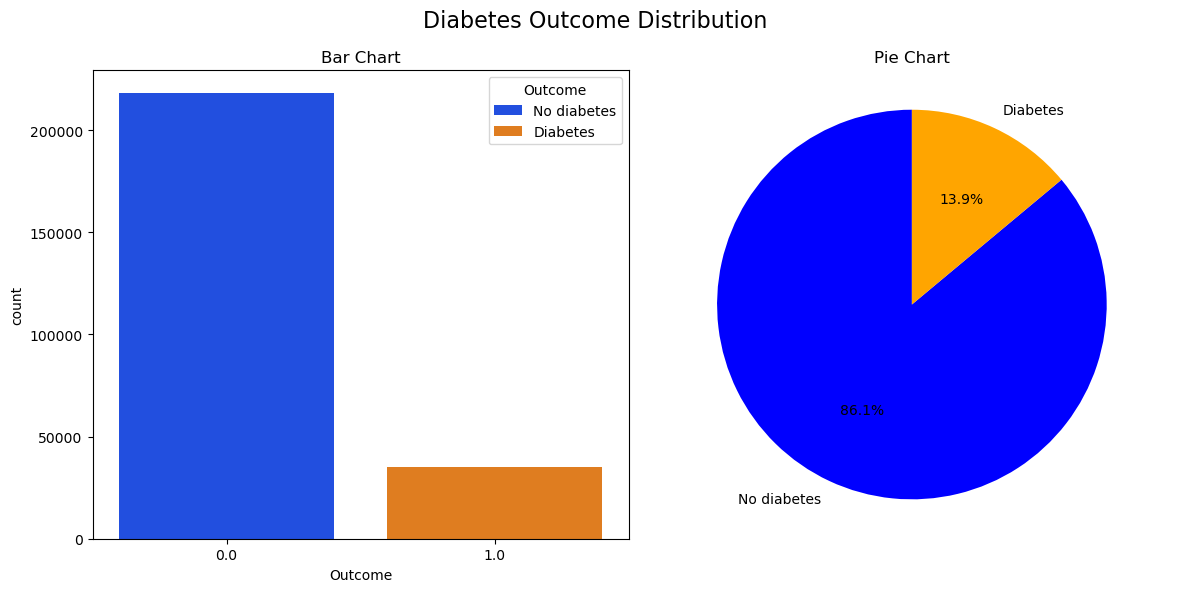

In [16]:
# Count and percentage
counts = diab_data['Outcome'].value_counts()
outcome_percent = round(counts / counts.sum() * 100, 1)

# Define legend labels
legend_labels = {0: 'No diabetes', 1: 'Diabetes'}
legend_labels_list = [legend_labels[i] for i in sorted(legend_labels.keys())]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(
    data=diab_data,
    x='Outcome',
    hue='Outcome',
    palette='bright',
    dodge=False,
    ax=axes[0]
)
axes[0].set_title('Bar Chart')

# Replace legend numbers with text
axes[0].legend(legend_labels_list, title="Outcome")

# Pie chart
axes[1].pie(
    counts,
    labels=legend_labels_list,
    colors=['blue', 'orange'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].axis('equal')
axes[1].set_title('Pie Chart')

# Overall title
plt.suptitle('Diabetes Outcome Distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
print("Loaded dataset and starting numeric feature analysis...")
# Identify numeric columns with more than 10 unique values (exclude binaries)
numeric_rich = [c for c in diab_data.columns if pd.api.types.is_numeric_dtype(diab_data[c]) and diab_data[c].nunique() > 15]
print("Numeric features with meaningful distributions:")
print(numeric_rich)

Loaded dataset and starting numeric feature analysis...
Numeric features with meaningful distributions:
['BMI', 'MentHlth', 'PhysHlth']


In [18]:
## Compute distribution stats, skewness, and outliers via IQR
rows = []
for col in numeric_rich:
    s = diab_data[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((s < lower) | (s > upper)).sum()
    skew = s.skew()
    kurt = s.kurtosis()
    rows.append({
        'feature': col,
        'min': s.min(),
        'q1': q1,
        'median': s.median(),
        'mean': s.mean(),
        'q3': q3,
        'max': s.max(),
        'std': s.std(),
        'skew': skew,
        'kurtosis': kurt,
        'iqr': iqr,
        'lower_bound': lower,
        'upper_bound': upper,
        'outlier_count': outliers,
        'outlier_pct': outliers / len(s) * 100
    })

summary = pd.DataFrame(rows)
summary_round = summary.copy()
summary_round[['min','q1','median','mean','q3','max','std','skew','kurtosis','iqr','lower_bound','upper_bound','outlier_pct']] = \
    summary_round[['min','q1','median','mean','q3','max','std','skew','kurtosis','iqr','lower_bound','upper_bound','outlier_pct']].round(2)
print("\
Distribution, skewness, and outlier summary:")
print(summary_round[['feature','min','q1','median','mean','q3','max','skew','kurtosis','outlier_count','outlier_pct']])

Distribution, skewness, and outlier summary:
    feature   min    q1  median   mean    q3   max  skew  kurtosis  \
0       BMI  12.0  24.0    27.0  28.38  31.0  98.0  2.12     11.00   
1  MentHlth   0.0   0.0     0.0   3.18   2.0  30.0  2.72      6.44   
2  PhysHlth   0.0   0.0     0.0   4.24   3.0  30.0  2.21      3.50   

   outlier_count  outlier_pct  
0           9847         3.88  
1          36208        14.27  
2          40949        16.14  


In [19]:
# Define domain-based bounds for health-related features
domain_bounds = {
    'MentHlth': (0, 30),
    'PhysHlth': (0, 30)
}

issues = []

for feature, (lower, upper) in domain_bounds.items():
    if feature in diab_data.columns:
        series = diab_data[feature]
        count_below_0 = (series < 0).sum()
        count_above_upper = (series > upper).sum()

        issues.append({
            'feature': feature,
            'below_0': int(count_below_0),
            f'above_{upper}': int(count_above_upper)
        })

issues_df = pd.DataFrame(issues)

print("\n📊 Domain-based unrealistic value checks:")
print(issues_df)


📊 Domain-based unrealistic value checks:
    feature  below_0  above_30
0  MentHlth        0         0
1  PhysHlth        0         0


In [32]:
# Define plausible BMI bounds
BMI_Lower_Bound = 10
BMI_upper_Bound = 80

issues = []

if 'BMI' in diab_data.columns:
    bmi_series = diab_data['BMI']
    bmi_below_0 = (bmi_series < 0).sum()
    bmi_below_10 = (bmi_series < BMI_Lower_Bound).sum()
    bmi_above_80 = (bmi_series > BMI_upper_Bound).sum()

    issues.append({
        'feature': 'BMI',
        'below_0': int(bmi_below_0),
        'below_10': int(bmi_below_10),
        'above_80': int(bmi_above_80)
    })

issues_df = pd.DataFrame(issues)

print("\n📊 Unrealistic or problematic value checks:")
print(issues_df)


📊 Unrealistic or problematic value checks:
  feature  below_0  below_10  above_80
0     BMI        0         0       279


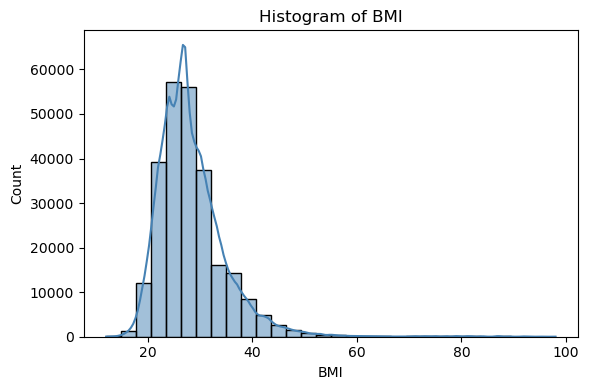

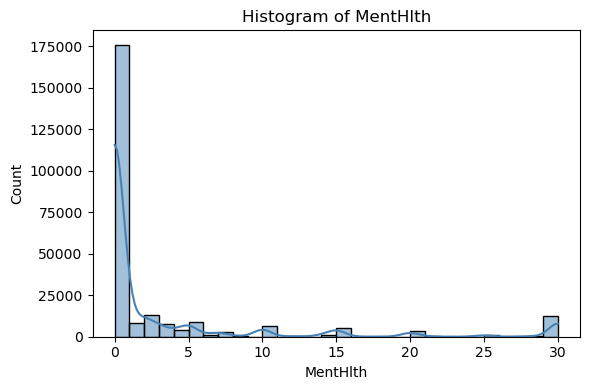

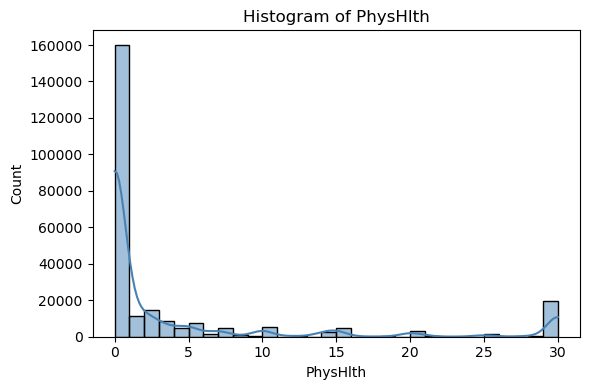

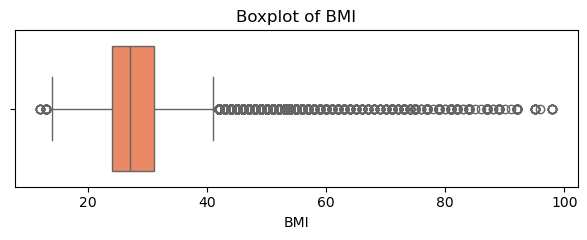

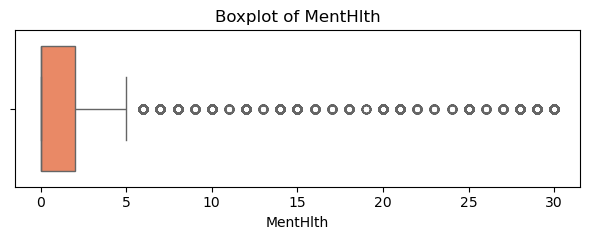

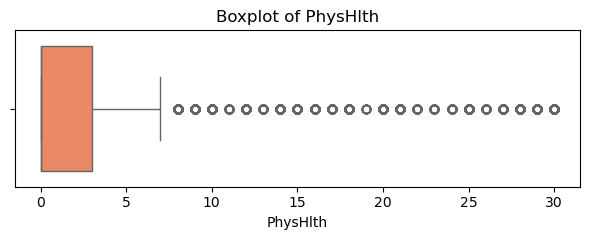

Generated summary tables and plots for BMI, MentHlth, and PhysHlth.


In [21]:
# Visualizations: Histograms and Boxplots for the main continuous/count features
plot_cols = [c for c in ['BMI','MentHlth','PhysHlth'] if c in diab_data.columns]

for col in plot_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(diab_data[col], bins=30, kde=True, color='steelblue')
    plt.title('Histogram of ' + col)
    plt.tight_layout()
    plt.show()

for col in plot_cols:
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=diab_data[col], color='coral')
    plt.title('Boxplot of ' + col)
    plt.tight_layout()
    plt.show()

print("Generated summary tables and plots for BMI, MentHlth, and PhysHlth.")

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


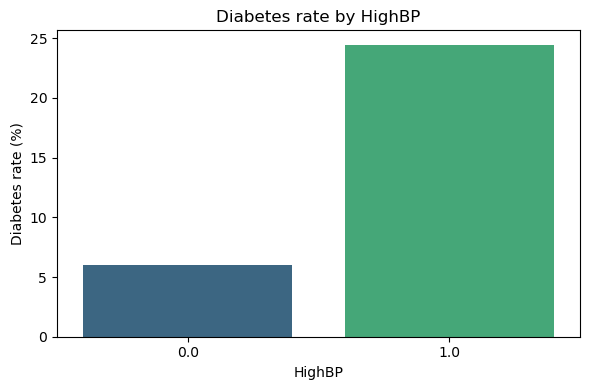

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


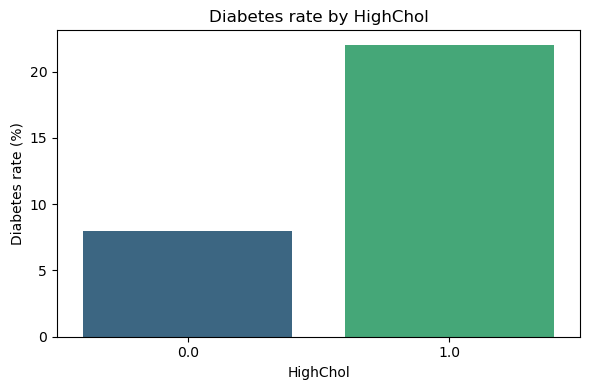

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


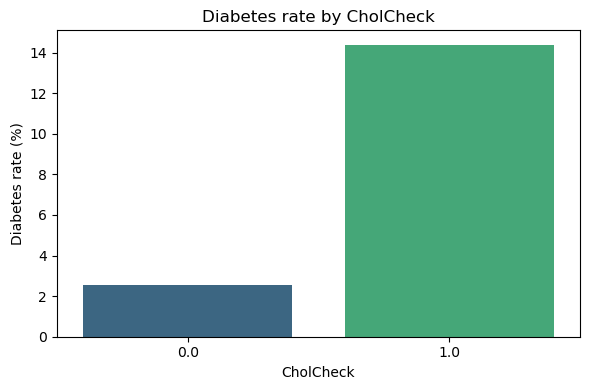

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


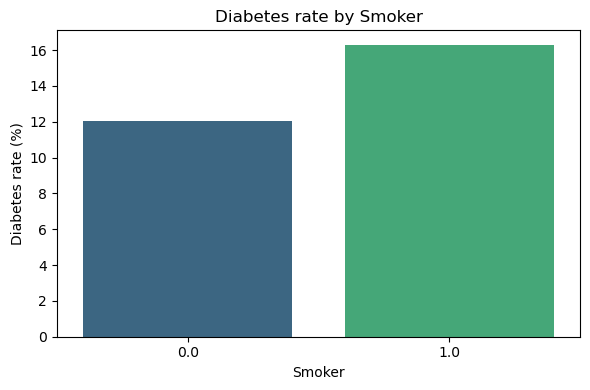

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


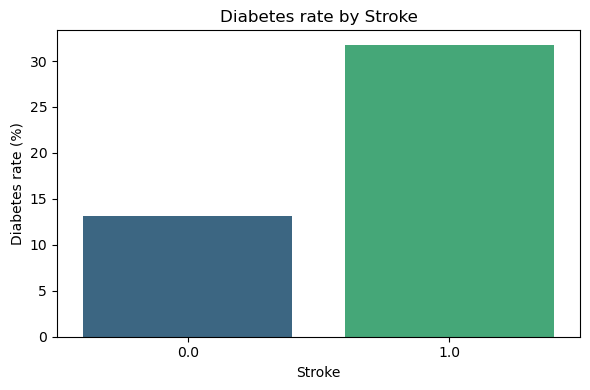

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


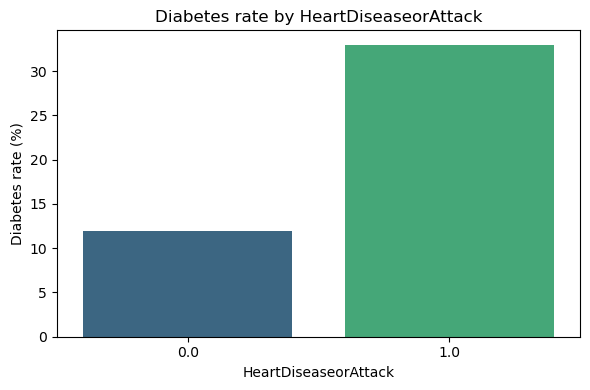

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


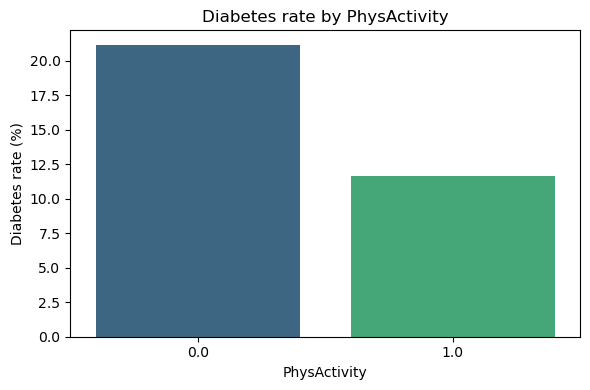

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


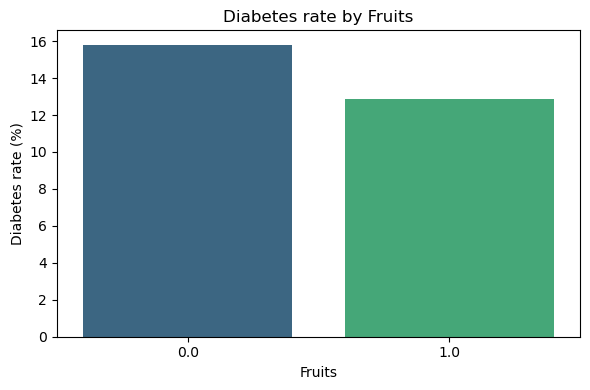

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


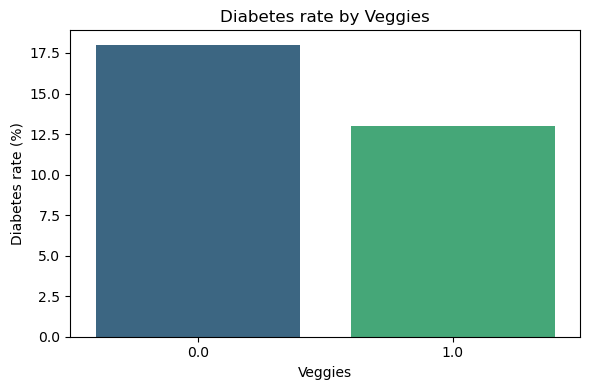

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


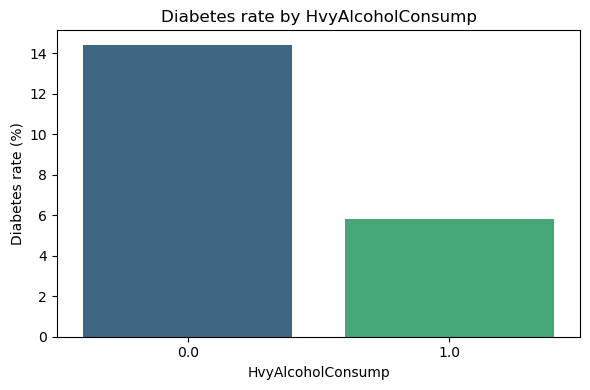

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


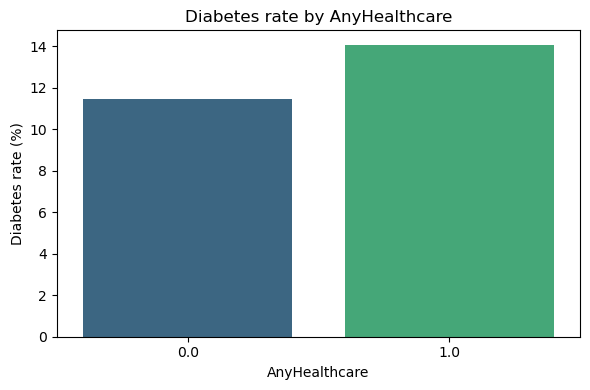

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


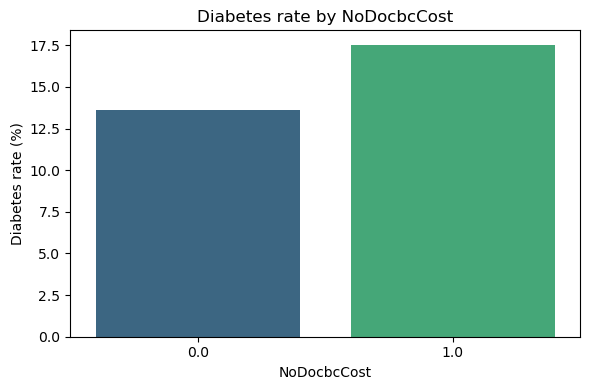

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


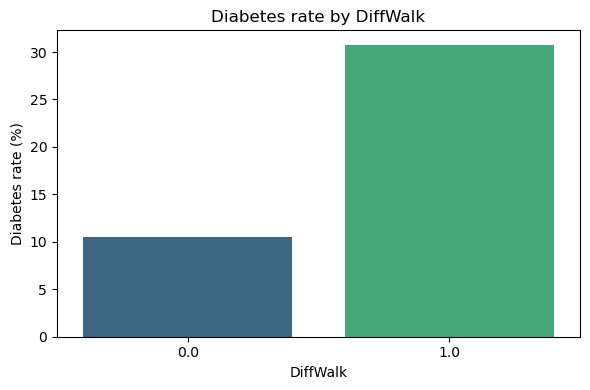

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


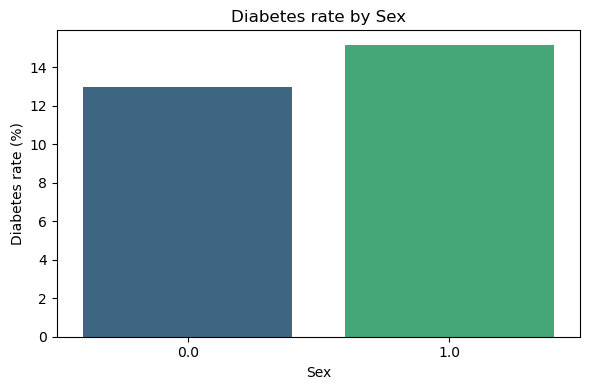

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


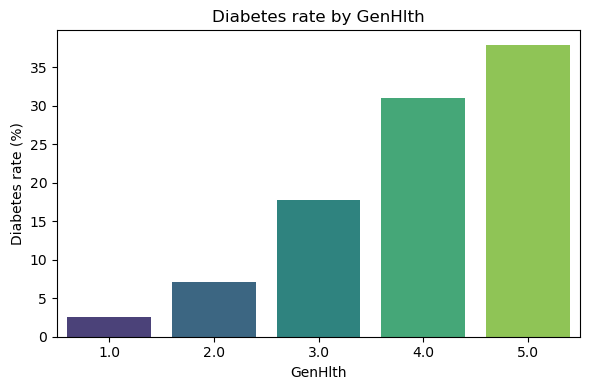

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


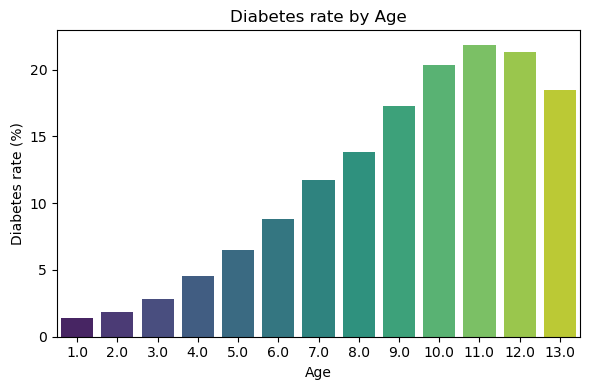

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


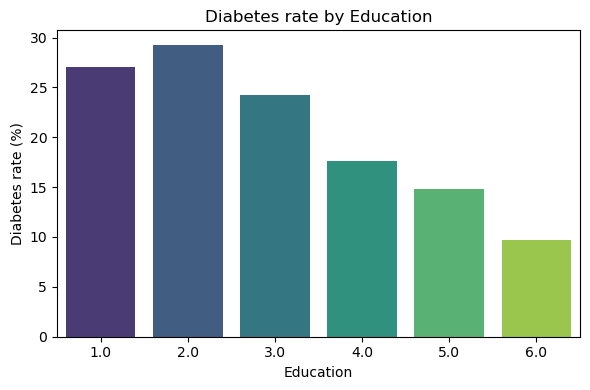

C:\Users\OWNER\AppData\Local\Temp\ipykernel_28448\1500621975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')


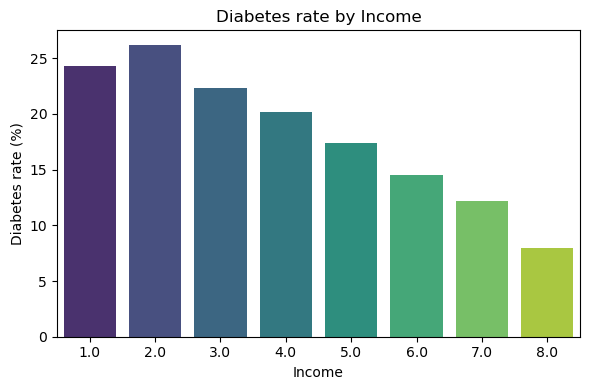

Generated bar plots for categorical features vs diabetes rate.


In [22]:
# Visualizations: Bar plots for key categorical features vs diabetes rate
#plot_features = ['GenHlth','PhysActivity','HighBP','HighChol','Income']
features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'GenHlth', 'Age', 'Education', 'Income']
for feat in features:
    plt.figure(figsize=(6,4))
    rates = diab_data.groupby(feat)['Outcome'].mean().reset_index()
    rates['DiabetesRate_pct'] = rates['Outcome'] * 100
    sns.barplot(data=rates, x=feat, y='DiabetesRate_pct', palette='viridis')
    plt.ylabel('Diabetes rate (%)')
    plt.title('Diabetes rate by ' + str(feat))
    plt.tight_layout()
    plt.show()

print("Generated bar plots for categorical features vs diabetes rate.")

<details>
<summary> ▶ Correlation of the numeric features</summary>
</details>

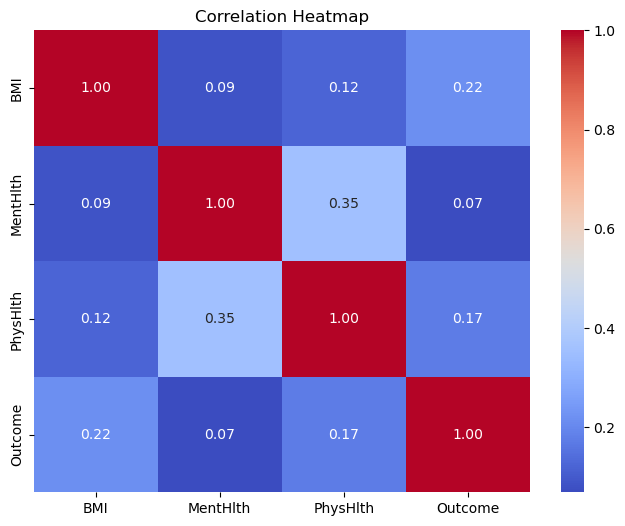

In [23]:
corr_matrix = diab_data[["BMI", "MentHlth", "PhysHlth", "Outcome"]].corr(method = "pearson")         
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [46]:
diab_data.describe()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<details>
<summary> ▶ Association of Binary Features with outcome</summary>
</details>

In [35]:
from scipy.stats import chi2_contingency
for feature in binary_features:
    contingency = pd.crosstab(diab_data[feature], df['Outcome'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{feature}: p-value = {p:.4f}")

HighBP: p-value = 0.0000
HighChol: p-value = 0.0000
CholCheck: p-value = 0.0000
Smoker: p-value = 0.0000
Stroke: p-value = 0.0000
HeartDiseaseorAttack: p-value = 0.0000
PhysActivity: p-value = 0.0000
Fruits: p-value = 0.0000
Veggies: p-value = 0.0000
HvyAlcoholConsump: p-value = 0.0000
AnyHealthcare: p-value = 0.0000
NoDocbcCost: p-value = 0.0000
DiffWalk: p-value = 0.0000
Sex: p-value = 0.0000


<details>
<summary> ▶ Correlation of Ordinal features with outcome</summary>
</details>

In [37]:
from scipy.stats import spearmanr

for feature in ordinal_features:
    r, p = spearmanr(diab_data[feature], diab_data['Outcome'])
    print(f"{feature}: Spearman r = {r:.3f}, p = {p:.4f}")

GenHlth: Spearman r = 0.288, p = 0.0000
Age: Spearman r = 0.178, p = 0.0000
Education: Spearman r = -0.120, p = 0.0000
Income: Spearman r = -0.163, p = 0.0000


<details>
<summary> ▶ Check and interpretation of multicollinearity</summary>
🔍 VIF > 5 suggests moderate multicollinearity
🔥 VIF > 10 is considered problematic
</details>

In [30]:
# Variance_inflation_factor Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ensure no categorical variables (encode them if needed)
X = diab_data.drop(columns=['Outcome'])  # exclude target
X = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                 Feature         VIF
0                  const  115.971455
14               GenHlth    1.795892
16              PhysHlth    1.623288
17              DiffWalk    1.533902
21                Income    1.503931
19                   Age    1.349994
1                 HighBP    1.330684
20             Education    1.326390
15              MentHlth    1.239297
2               HighChol    1.173313
7   HeartDiseaseorAttack    1.171917
8           PhysActivity    1.157311
13           NoDocbcCost    1.144158
4                    BMI    1.139724
12         AnyHealthcare    1.113104
9                 Fruits    1.112533
10               Veggies    1.112385
5                 Smoker    1.091787
6                 Stroke    1.081070
18                   Sex    1.075060
3              CholCheck    1.032822
11     HvyAlcoholConsump    1.024059


## Data Pre-processing

In [ ]:
#features_column = diab_data.iloc[:, 1:]
#features_column
